In [1]:
import pandas as pd 
import numpy as np
import spacy
import regex as re
import seaborn as sns
from matplotlib import pyplot as plt
from itertools import zip_longest
from wordcloud import WordCloud
import plotly.express as px

model_spacy = spacy.load('en_core_web_lg')

In [2]:
df = pd.read_csv('dataset\\df_m.csv')

In [3]:
df.head()

,text,anottator1,anottator2,anottator3,majority
0,@Cloudflare reports #ransom #DDoS attacks have...,Not_News,Not_News,Not_News,Not_News
1,Here’s the one thing you mustn’t tell hackers ...,Not_News,Not_News,Not_News,Not_News
2,@TactiKoolSec There was the time where a not-s...,Not_News,Not_News,Not_News,Not_News
3,Ransomware is a fast-growing threat impacting ...,Not_News,Not_News,Not_News,Not_News
4,Five key cloud and innovation takeaways from I...,Not_News,Not_News,Not_News,Not_News


In [4]:
df['majority'].value_counts()

majority
Not_News          31231
Normal_News        3948
High_Risk_News      892
Exluded               9
Name: count, dtype: int64

In [5]:
df['text'].isna().sum()

0

In [6]:
df['text'][0]

'@Cloudflare reports #ransom #DDoS attacks have dropped drastically in 2022, with 17% of its DDoS-targeted clients reporting an #extortion in Jan, 6% in Feb, and 3% in Mar 2022. @dynamicCISO #Ransomware #100DaysOfCode #Malware #GirlsWhoCode #InfoSec #cyberattacks #cybersecurity https://t.co/bXe7xZ6UPO'

In [7]:
df.count()

text          36080
anottator1    36080
anottator2    36080
anottator3    36080
majority      36080
dtype: int64

<Axes: xlabel='count', ylabel='majority'>

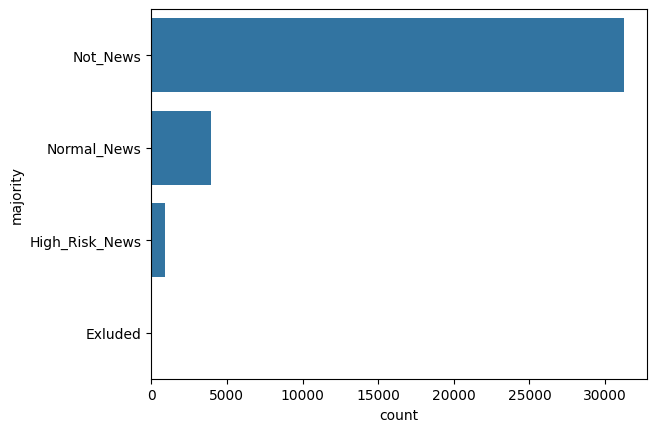

In [8]:
sns.countplot(df['majority'])

In [9]:
def checkstartwithSymbol(text):
    pattern = r'^[@!#$%^&*()_+={}\[\]:;"\'<>,.?/\\|`~]'
    if re.match(pattern, text):
        return True
    else:
        return False

In [10]:
def preprocessText(text):
    doc = model_spacy(text)
    new_doc = []
    for token in doc:
        if token.is_punct:
           continue 
        elif token.is_stop:
            continue
        elif checkstartwithSymbol(token.text):
            new_doc.append(token.text[1:])
        elif token.text.startswith('https://'):
            continue    
        elif '\n\n' == token.text or '\n'== token.text or '&gt;&gt'==token.text or '  '== token.text or ' ' == token.text or '.'==token.text or "''"==token.text:
            continue
        else:  
            new_doc.append(token.text.lower())
    return (' '.join(new_doc)).rstrip()          

In [11]:
def visualiseData():
    num = np.random.randint(0,36080)
    print(preprocessText(df['text'][num]))
    print()
    print(df['text'][num])

In [12]:
visualiseData()

united states committed taking action actors willfully disregard anti money laundering countering financing terrorism aml cft obligations allow systems abused illicit actors

The United States is committed to taking action against actors that willfully disregard Anti-Money Laundering and Countering the Financing of Terrorism (AML/CFT) obligations and allow their systems to be abused by illicit actors. https://t.co/pQDJiA2VfT


In [13]:
# counting Number of tokens and there frequency


In [14]:
df['Cleared_data'] = df['text'].apply(preprocessText)

In [15]:
df.head()

,text,anottator1,anottator2,anottator3,majority,Cleared_data
0,@Cloudflare reports #ransom #DDoS attacks have...,Not_News,Not_News,Not_News,Not_News,Cloudflare reports ransom ddos attacks dropped...
1,Here’s the one thing you mustn’t tell hackers ...,Not_News,Not_News,Not_News,Not_News,thing tell hackers business successfully hit r...
2,@TactiKoolSec There was the time where a not-s...,Not_News,Not_News,Not_News,Not_News,TactiKoolSec time great job server admin resto...
3,Ransomware is a fast-growing threat impacting ...,Not_News,Not_News,Not_News,Not_News,ransomware fast growing threat impacting organ...
4,Five key cloud and innovation takeaways from I...,Not_News,Not_News,Not_News,Not_News,key cloud innovation takeaways ing amp google ...


In [16]:
all_tokens = []
def allTokensFromCorpus(text):
    doc = model_spacy(text)
    for token in doc:
        all_tokens.append(token.text)

In [17]:
df['Cleared_data'].apply(allTokensFromCorpus)

0        None
1        None
2        None
3        None
4        None
         ... 
36075    None
36076    None
36077    None
36078    None
36079    None
Name: Cleared_data, Length: 36080, dtype: object

In [18]:
all_tokens

['Cloudflare',
 'reports',
 'ransom',
 'ddos',
 'attacks',
 'dropped',
 'drastically',
 '2022',
 '17',
 'ddos',
 'targeted',
 'clients',
 'reporting',
 'extortion',
 'jan',
 '6',
 'feb',
 '3',
 'mar',
 '2022',
 'dynamicCISO',
 'ransomware',
 '100daysofcode',
 'malware',
 'girlswhocode',
 'infosec',
 'cyberattacks',
 'cybersecurity',
 'thing',
 'tell',
 'hackers',
 'business',
 'successfully',
 'hit',
 'ransomware',
 'attack',
 'lock',
 'data',
 'demand',
 'ransom',
 'fee',
 'TactiKoolSec',
 'time',
 'great',
 'job',
 'server',
 'admin',
 'restored',
 'company',
 'wide',
 'file',
 'server',
 'ransomware',
 'encrypted',
 'restored',
 'control',
 'permissions',
 'informed',
 'iam',
 'team',
 'problem',
 'happened',
 'twice',
 'ransomware',
 'fast',
 'growing',
 'threat',
 'impacting',
 'organizations',
 'sizes',
 'industries',
 'find',
 'exactly',
 'hit',
 'ransomware',
 'attack',
 'cybersecurity',
 'ransomeware',
 'key',
 'cloud',
 'innovation',
 'takeaways',
 'ing',
 'amp',
 'google',
 

In [19]:
from collections import Counter
word_counts = Counter(all_tokens)


In [20]:
word_counts

Counter({'ransomware': 21196,
         'phishing': 8867,
         'cybersecurity': 8270,
         'malware': 5694,
         'attack': 4951,
         'hacking': 4923,
         'infosec': 4911,
         'cyberattack': 4373,
         'security': 3996,
         'attacks': 3504,
         'threatintel': 3343,
         'infosecurity': 3255,
         'cloudcomputing': 3214,
         'cloudsecurity': 3212,
         'threatintelligence': 3203,
         'cybernews': 3177,
         'devops': 3164,
         'threathunting': 3163,
         'dfir': 3160,
         'data': 3109,
         ' ': 2655,
         'new': 2224,
         'hacked': 2196,
         'cyber': 2133,
         'amp': 1865,
         'spyware': 1807,
         'threat': 1475,
         'email': 1418,
         'report': 1392,
         'group': 1373,
         'scam': 1328,
         'like': 1296,
         'hackers': 1239,
         '\xa0 ': 1170,
         'read': 1142,
         'hit': 1139,
         'conti': 1114,
         'cybercrime': 1103,


In [21]:
top_50_words = word_counts.most_common(50)

In [22]:
top_50_words

[('ransomware', 21196),
 ('phishing', 8867),
 ('cybersecurity', 8270),
 ('malware', 5694),
 ('attack', 4951),
 ('hacking', 4923),
 ('infosec', 4911),
 ('cyberattack', 4373),
 ('security', 3996),
 ('attacks', 3504),
 ('threatintel', 3343),
 ('infosecurity', 3255),
 ('cloudcomputing', 3214),
 ('cloudsecurity', 3212),
 ('threatintelligence', 3203),
 ('cybernews', 3177),
 ('devops', 3164),
 ('threathunting', 3163),
 ('dfir', 3160),
 ('data', 3109),
 (' ', 2655),
 ('new', 2224),
 ('hacked', 2196),
 ('cyber', 2133),
 ('amp', 1865),
 ('spyware', 1807),
 ('threat', 1475),
 ('email', 1418),
 ('report', 1392),
 ('group', 1373),
 ('scam', 1328),
 ('like', 1296),
 ('hackers', 1239),
 ('\xa0 ', 1170),
 ('read', 1142),
 ('hit', 1139),
 ('conti', 1114),
 ('cybercrime', 1103),
 ('business', 1096),
 ('account', 1051),
 ('learn', 1050),
 ('2022', 989),
 ('cyberattacks', 982),
 ('help', 981),
 ('hacker', 954),
 ('facebookdown', 931),
 ('know', 925),
 ('organizations', 915),
 ('gang', 908),
 ('need', 899)

In [23]:
top_20_words = word_counts.most_common(20)

In [24]:
top_20_words

[('ransomware', 21196),
 ('phishing', 8867),
 ('cybersecurity', 8270),
 ('malware', 5694),
 ('attack', 4951),
 ('hacking', 4923),
 ('infosec', 4911),
 ('cyberattack', 4373),
 ('security', 3996),
 ('attacks', 3504),
 ('threatintel', 3343),
 ('infosecurity', 3255),
 ('cloudcomputing', 3214),
 ('cloudsecurity', 3212),
 ('threatintelligence', 3203),
 ('cybernews', 3177),
 ('devops', 3164),
 ('threathunting', 3163),
 ('dfir', 3160),
 ('data', 3109)]

In [25]:
X = []
Y = []
for tuple in top_20_words:
    X.append(tuple[0])
    Y.append(tuple[1])

In [26]:
X,Y

(['ransomware',
  'phishing',
  'cybersecurity',
  'malware',
  'attack',
  'hacking',
  'infosec',
  'cyberattack',
  'security',
  'attacks',
  'threatintel',
  'infosecurity',
  'cloudcomputing',
  'cloudsecurity',
  'threatintelligence',
  'cybernews',
  'devops',
  'threathunting',
  'dfir',
  'data'],
 [21196,
  8867,
  8270,
  5694,
  4951,
  4923,
  4911,
  4373,
  3996,
  3504,
  3343,
  3255,
  3214,
  3212,
  3203,
  3177,
  3164,
  3163,
  3160,
  3109])

In [27]:
len(X)

20

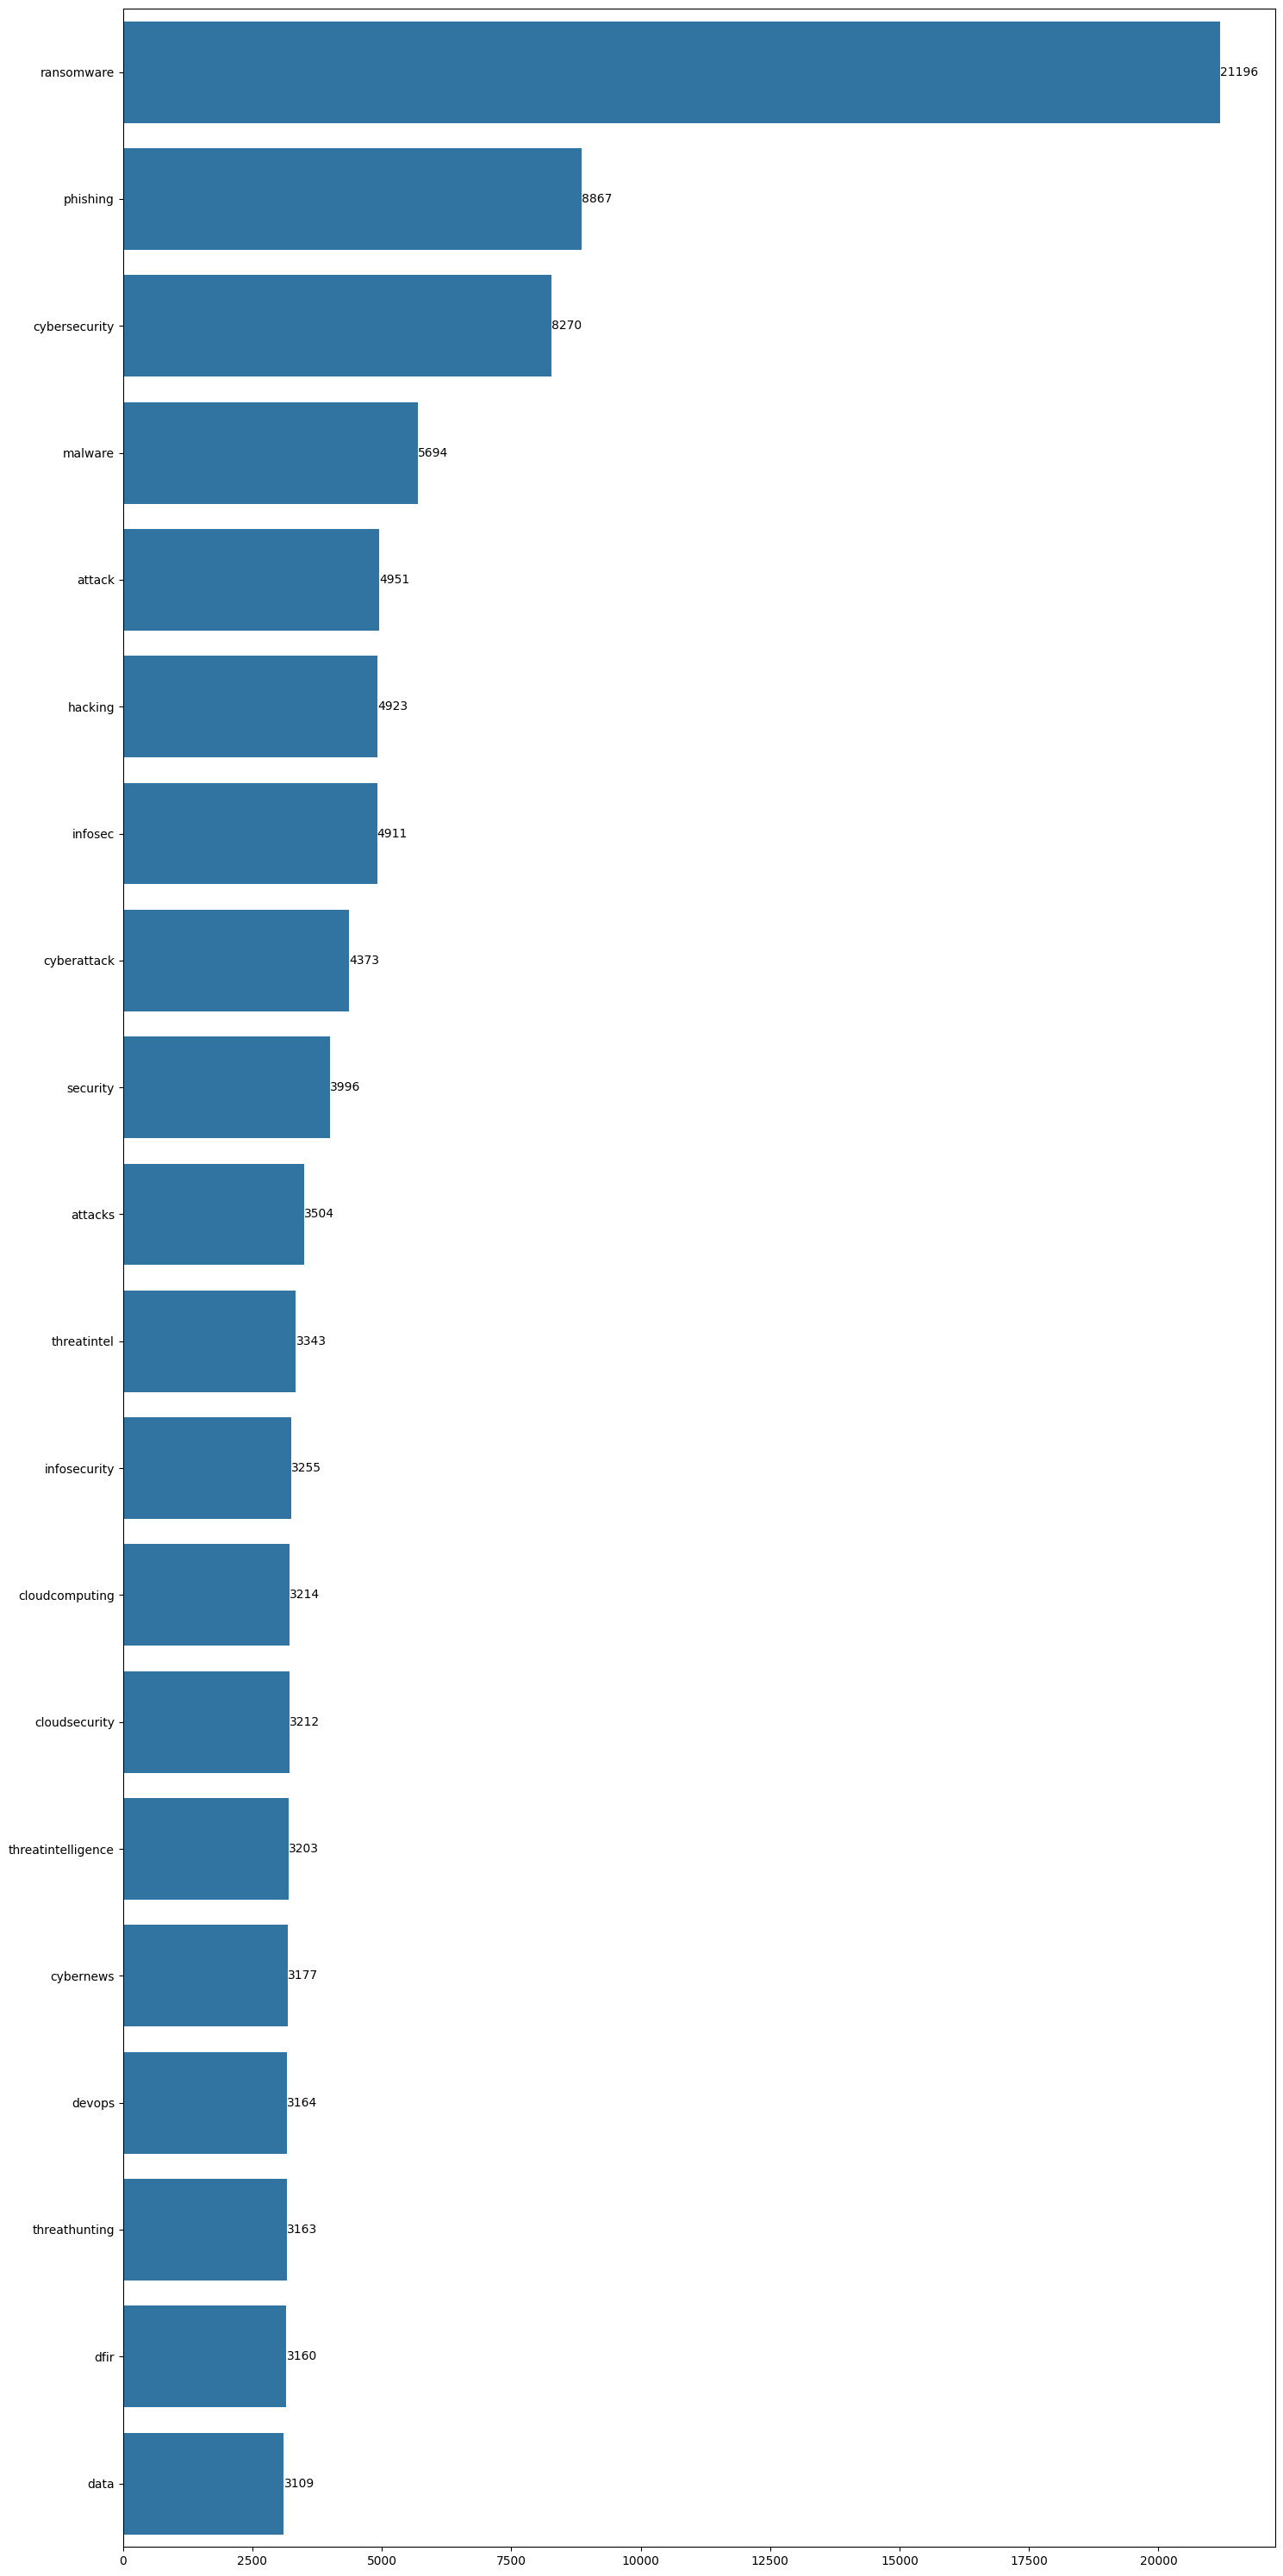

In [28]:

fig, ax = plt.subplots(figsize=(15, 30))
sns.barplot(x=Y, y=X, ax=ax, orient='h') 
for i, value in enumerate(Y):
    ax.text(value + 0.5, i, str(value), va='center')
plt.tight_layout()

In [29]:

words = dict(top_50_words)

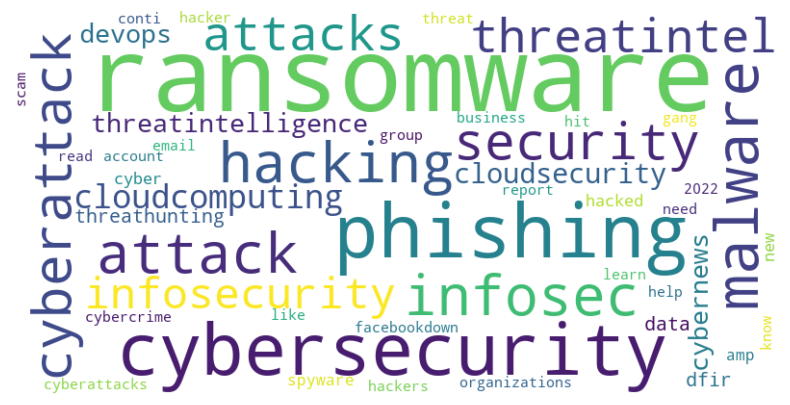

In [30]:
#word Cloud with top 50 words
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()


In [2]:
result = pd.read_csv('D:\\NLP\\project\\result.csv')

In [3]:
result.head()

,models,ngrams,Text_vectorization,accuracy_score,precision_score,f1_score,recall_score
0,SVM,"(1,3)",BOW(CountVectorizer),0.972,0.971504,0.971576,0.971729
1,Logistic Regression,"(1,3)",BOW(CountVectorizer),0.974,0.973661,0.973806,0.974224
2,Decision Tree,"(1,3)",BOW(CountVectorizer),0.959,0.958678,0.958706,0.958841
3,Naive Bayes,"(1,3)",BOW(CountVectorizer),0.966,0.965154,0.964973,0.965771
4,KNN,"(1,3)",BOW(CountVectorizer),0.947,0.945166,0.941961,0.946924


In [4]:
result = result.sort_values(by='accuracy_score')
x =  result['models']+" "+result['ngrams']+" "+result['Text_vectorization']

In [5]:
px.line(x=x,y=result['accuracy_score'],markers='o',labels={'x':'models','y':'accuracy'},title="Accuracy comparision of different models")

In [6]:
px.bar(x=x,y=result['accuracy_score'],labels={'x':'models','y':'accuracy'},title="Accuracy comparision of different models")

In [7]:
result = result.sort_values(by='precision_score')
x =  result['models']+" "+result['ngrams']+" "+result['Text_vectorization']

In [8]:
px.line(x=x,y=result['precision_score'],markers='o',labels={'x':'models','y':'precision'},title="precision comparision of different models")

In [9]:
px.bar(x=x,y=result['precision_score'],labels={'x':'models','y':'precision'},title="precision comparision of different models")

In [10]:
result = result.sort_values(by='f1_score')
x =  result['models']+" "+result['ngrams']+" "+result['Text_vectorization']

In [11]:
px.line(x=x,y=result['f1_score'],markers='o',labels={'x':'models','y':'f1-score'},title="f1-score comparision of different models")

In [12]:
px.bar(x=x,y=result['f1_score'],labels={'x':'models','y':'f1-score'},title="f1-score comparision of different models")

In [13]:
result = result.sort_values(by='recall_score')
x =  result['models']+" "+result['ngrams']+" "+result['Text_vectorization']

In [14]:
px.line(x=x,y=result['recall_score'],markers='o',labels={'x':'models','y':'recall'},title="recall comparision of different models")

In [15]:
px.bar(x=x,y=result['recall_score'],labels={'x':'models','y':'recall'},title="recall comparision of different models")

In [16]:
result = result.sort_values(by='accuracy_score')
px.line(result,x=x,y=['accuracy_score','f1_score','recall_score','precision_score'],markers='o',labels={'x':'models','y':'value'},width=1250, height=800,title='Model performance metrice curves on testing')

In [17]:
px.bar(result,x=x,y=['accuracy_score','f1_score','recall_score','precision_score'],labels={'x':'models','y':'value'},width=1250, height=800,title='Model performance metrice curves on testing')

In [18]:
result.head()

,models,ngrams,Text_vectorization,accuracy_score,precision_score,f1_score,recall_score
28,Naive Bayes,default,TF-IDF,0.914,0.916263,0.894810,0.914080
23,Naive Bayes,"(1,2)",TF-IDF,0.931,0.931968,0.919643,0.930571
13,Naive Bayes,"(1,3)",TF-IDF,0.937,0.937964,0.928221,0.936807
14,KNN,"(1,3)",TF-IDF,0.940,0.938028,0.933798,0.940133
24,KNN,"(1,2)",TF-IDF,0.942,0.939620,0.936209,0.941935


In [19]:
df1 = result[result['ngrams']=='(1,2)']

In [20]:
df1

,models,ngrams,Text_vectorization,accuracy_score,precision_score,f1_score,recall_score
23,Naive Bayes,"(1,2)",TF-IDF,0.931,0.931968,0.919643,0.930571
24,KNN,"(1,2)",TF-IDF,0.942,0.939620,0.936209,0.941935
22,Decision Tree,"(1,2)",TF-IDF,0.949,0.951034,0.950057,0.949418
9,KNN,"(1,2)",BOW(CountVectorizer),0.951,0.949294,0.947741,0.951497
7,Decision Tree,"(1,2)",BOW(CountVectorizer),0.959,0.959464,0.959399,0.959396
8,Naive Bayes,"(1,2)",BOW(CountVectorizer),0.965,0.964576,0.964068,0.965078
21,Logistic Regression,"(1,2)",TF-IDF,0.969,0.968173,0.968009,0.968958
5,SVM,"(1,2)",BOW(CountVectorizer),0.971,0.970718,0.970684,0.970759
20,SVM,"(1,2)",TF-IDF,0.972,0.972170,0.971780,0.972007
6,Logistic Regression,"(1,2)",BOW(CountVectorizer),0.974,0.973504,0.973572,0.973947


In [43]:
df1 = df1.sort_values(by='accuracy_score')
x =  df1['models']+" "+df1['ngrams']+" "+df1['Text_vectorization']
px.line(df1,x=x,y=['accuracy_score','f1_score','recall_score','precision_score'],markers='o',labels={'x':'models','y':'value'},width=1250, height=800,title='Model performance metrice curves on testing using (1,2) ngram technique')

In [42]:
df1 = result[result['ngrams']=='(1,3)']
df1 = df1.sort_values(by='accuracy_score')
x =  df1['models']+" "+df1['ngrams']+" "+df1['Text_vectorization']
px.line(df1,x=x,y=['accuracy_score','f1_score','recall_score','precision_score'],markers='o',labels={'x':'models','y':'value'},width=1250, height=800,title='Model performance metrice curves on testing using (1,3) ngrams technique')

In [41]:
df1 = result[result['ngrams']=='default']
df1 = df1.sort_values(by='accuracy_score')
x =  df1['models']+" "+df1['ngrams']+" "+df1['Text_vectorization']
px.line(df1,x=x,y=['accuracy_score','f1_score','recall_score','precision_score'],markers='o',labels={'x':'models','y':'value'},width=1250, height=800,title='Model performance metrice curves on testing using default ngram technique')

In [24]:
result.columns

Index(['models', 'ngrams', 'Text_vectorization', 'accuracy_score',
       'precision_score', 'f1_score', 'recall_score'],
      dtype='object')

In [40]:
df1 = result[result['models']=='SVM']
df1 = df1.sort_values(by='accuracy_score')
x =  df1['models']+" "+df1['ngrams']+" "+df1['Text_vectorization']
px.line(df1,x=x,y=['accuracy_score','f1_score','recall_score','precision_score'],markers='o',labels={'x':'models','y':'value'},width=1250, height=800,title='SVM Model performance metrice curves on testing')

In [39]:
df1 = result[result['models']=='KNN']
df1 = df1.sort_values(by='accuracy_score')
x =  df1['models']+" "+df1['ngrams']+" "+df1['Text_vectorization']
px.line(df1,x=x,y=['accuracy_score','f1_score','recall_score','precision_score'],markers='o',labels={'x':'models','y':'value'},width=1250, height=800,title='KNN Model performance metrice curves on testing')

In [37]:
df1 = result[result['models']=='Logistic Regression']
df1 = df1.sort_values(by='accuracy_score')
x =  df1['models']+" "+df1['ngrams']+" "+df1['Text_vectorization']
px.line(df1,x=x,y=['accuracy_score','f1_score','recall_score','precision_score'],markers='o',labels={'x':'models','y':'value'},width=1250, height=800,title='Logistic Regression Model performance metrice curves on testing')

In [38]:
df1 = result[result['models']=='Decision Tree']
df1 = df1.sort_values(by='accuracy_score')
x =  df1['models']+" "+df1['ngrams']+" "+df1['Text_vectorization']
px.line(df1,x=x,y=['accuracy_score','f1_score','recall_score','precision_score'],markers='o',labels={'x':'models','y':'value'},width=1250, height=800,title='Decision Tree Model performance metrice curves on testing')

In [36]:
df1 = result[result['models']=='Naive Bayes']
df1 = df1.sort_values(by='accuracy_score')
x =  df1['models']+" "+df1['ngrams']+" "+df1['Text_vectorization']
px.line(df1,x=x,y=['accuracy_score','f1_score','recall_score','precision_score'],markers='o',labels={'x':'models','y':'value'},width=1250, height=800,title='Model performance metrice curves on testing using Naive bayes model')

In [30]:
df1

,models,ngrams,Text_vectorization,accuracy_score,precision_score,f1_score,recall_score
28,Naive Bayes,default,TF-IDF,0.914,0.916263,0.894810,0.914080
23,Naive Bayes,"(1,2)",TF-IDF,0.931,0.931968,0.919643,0.930571
13,Naive Bayes,"(1,3)",TF-IDF,0.937,0.937964,0.928221,0.936807
18,Naive Bayes,default,BOW(CountVectorizer),0.952,0.953467,0.951273,0.951774
8,Naive Bayes,"(1,2)",BOW(CountVectorizer),0.965,0.964576,0.964068,0.965078
3,Naive Bayes,"(1,3)",BOW(CountVectorizer),0.966,0.965154,0.964973,0.965771


In [34]:
df1 = result[result['Text_vectorization']=='TF-IDF']
df1 = df1.sort_values(by='accuracy_score')
x =  df1['models']+" "+df1['ngrams']
px.line(df1,x=x,y=['accuracy_score','f1_score','recall_score','precision_score'],markers='o',labels={'x':'models','y':'value'},width=1250, height=800,title='Model performance metrice curves on testing using tf-idf vectorizer')

In [35]:
df1 = result[result['Text_vectorization']=='BOW(CountVectorizer)']
df1 = df1.sort_values(by='accuracy_score')
x =  df1['models']+" "+df1['ngrams']
px.line(df1,x=x,y=['accuracy_score','f1_score','recall_score','precision_score'],markers='o',labels={'x':'models','y':'value'},width=1250, height=800,title='Model performance metrice curves on testing using count vectorization')